<p><font size="6" color='grey'> <b>
Python meets ChatGPT
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
Projekt Weather App
</b></font> </br></p>



---

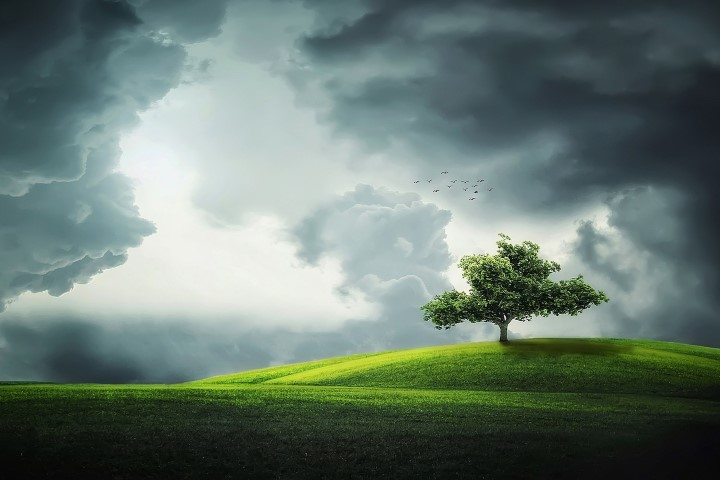

Bild von <a href="https://pixabay.com/de/users/bessi-909086/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=832079">bess.hamiti@gmail.com</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=832079">Pixabay</a>

# 1 | Projektauftrag
---

**Ziel:**

Erstellung einer Gradio-App, die Wetterinformationen anzeigt. Nutzer können eine Stadt eingeben, und die App zeigt die aktuelle Wettervorhersage an.



**Hauptaufgaben:**

+ Einrichtung einer Schnittstelle zu einer öffentlichen Wetter-API.
+ Entwicklung einer Benutzeroberfläche mit Gradio, die ein Eingabefeld für die Stadt und ein Ausgabefeld für die Wetterdaten enthält.
+ Das Eingabefeld ist mit dem Wert `New York` vorzubelegen.
+ Implementierung von Fehlerbehandlungen für den Fall, dass keine Daten für eine Stadt gefunden werden.

Bitte die `public URL` nach Erstellung und Test veröffentlichen.

# 2 | Lösungsvorschlag
---

**API-Key:**

Hinterlegen Sie den API-Key in den Colab-Secrets unter dem Namen: openweathermap

In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr
import requests
from google.colab import userdata

In [ ]:
def Wettervorhersage(Stadt):
    # Ersetzen Sie 'Ihr_API_Schlüssel' mit Ihrem tatsächlichen OpenWeatherMap API Schlüssel
    API_Key = userdata.get('openweathermap')
    BasisUrl = "http://api.openweathermap.org/data/2.5/weather"

    # Vollständige URL, die für die API-Anfrage verwendet wird
    VollständigeUrl = f"{BasisUrl}?q={Stadt}&appid={API_Key}&units=metric&lang=de"

    # Sendet eine Anfrage an die OpenWeatherMap API
    Antwort = requests.get(VollständigeUrl)

    # Überprüft, ob die Anfrage erfolgreich war
    if Antwort.status_code == 200:
        Daten = Antwort.json()
        Wetter = Daten['weather'][0]['description']
        Temperatur = Daten['main']['temp']
        return f"Wetter: {Wetter}, Temperatur: {Temperatur:.1f}°C"
    else:
        return "Fehler: Stadt nicht gefunden. Bitte versuchen Sie es erneut."

In [ ]:
interface = gr.Interface(fn=Wettervorhersage,
                         inputs=gr.Textbox(lines=2, placeholder="Geben Sie den Namen einer Stadt ein...", value="New York"),
                         outputs=gr.Text(label="Wetterdaten:"),
                         title="Wettervorhersage-App",
                         description="Diese App liefert die Wettervorhersage für die eingegebene Stadt. <br> Quelle der Wetterdaten: OpenWeatherMap",
                         allow_flagging="never")

interface.launch()

# 3 | Deployment
---

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  .py-Datei erstellen - API_Key ersetzen</font> </br></p>
# %%writefile app.py
# import gradio as gr
# import requests
# from google.colab import userdata
# def Wettervorhersage(Stadt):
#     # Ersetzen Sie 'Ihr_API_Schlüssel' mit Ihrem tatsächlichen OpenWeatherMap API Schlüssel
#     API_Key = userdata.get('openweathermap')
#     BasisUrl = "http://api.openweathermap.org/data/2.5/weather"

#     # Vollständige URL, die für die API-Anfrage verwendet wird
#     VollständigeUrl = f"{BasisUrl}?q={Stadt}&appid={API_Key}&units=metric&lang=de"

#     # Sendet eine Anfrage an die OpenWeatherMap API
#     Antwort = requests.get(VollständigeUrl)

#     # Überprüft, ob die Anfrage erfolgreich war
#     if Antwort.status_code == 200:
#         Daten = Antwort.json()
#         Wetter = Daten['weather'][0]['description']
#         Temperatur = Daten['main']['temp']
#         return f"Wetter: {Wetter}, Temperatur: {Temperatur:.1f}°C"
#     else:
#         return "Fehler: Stadt nicht gefunden. Bitte versuchen Sie es erneut."
# interface = gr.Interface(fn=Wettervorhersage,
#                          inputs=gr.Textbox(lines=2, placeholder="Geben Sie den Namen einer Stadt ein...", value="New York"),
#                          outputs=gr.Text(label="Wetterdaten:"),
#                          title="Wettervorhersage-App",
#                          description="Diese App liefert die Wettervorhersage für die eingegebene Stadt. <br> Quelle der Wetterdaten: OpenWeatherMap",
#                          allow_flagging="never")

# interface.launch()